**Tabla de contenido**

- [Pron√≥stico del uso de ancho de banda para centros de datos](#Pronostico-del-uso-de-ancho-de-banda-para-centros-de-datos)
- [Examinando el proceso de media movil autorregresivo](#Examinando-el-proceso-de-media-movil-autorregresivo)
- [Identificaci√≥n de un proceso ARMA estacionario](#Identificacion-de-un-proceso-ARMA-estacionario)
- [Elaboraci√≥n de un procedimiento de modelado general](#Elaboracion-de-un-procedimiento-de-modelado-general)
- [Comprendiendo el criterio de informaci√≥n de Akaike (AIC)](#Comprendiendo-el-criterio-de-informacion-de-Akaike-(AIC))
- [Seleccionando un modelo usando el AIC](#Seleccionando-un-modelo-usando-el-AIC)
- [Entendiendo el an√°lisis residual](#Entendiendo-el-analisis-residual)
    - [An√°lisis cualitativo Q-Qplot](#Analisis-cualitativo)
    - [An√°lisis cuantitativo Ljung-Box](#Analisis-cuantitativo-Ljung-Box)
- [Aplicando el procedimiento de modelado general](#Aplicando-el-procedimiento-de-modelado-general)
- [Pronosticando el uso de ancho de banda](#Pronosticando-el-uso-de-ancho-de-banda)
- [Pr√≥ximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

En este cap√≠tulo, examinaremos el `proceso de media m√≥vil autorregresiva`, ARMA(p,q), donde p denota el orden de la parte autorregresiva y q denota el orden de la parte de media m√≥vil. Adem√°s, el uso de los gr√°ficos ACF y PACF para determinar los √≥rdenes q y p, respectivamente, se vuelve complicado, ya que ambos gr√°ficos mostrar√°n un patr√≥n de decaimiento lento o sinusoidal. Por lo tanto, definiremos un procedimiento de modelado general que nos permitir√° modelar series temporales tan complejas. Este procedimiento implica la selecci√≥n del modelo utilizando el criterio de informaci√≥n de Akaike (AIC), que determinar√° la combinaci√≥n √≥ptima de p y q para nuestra serie.

Entonces debemos evaluar la validez del modelo utilizando el an√°lisis de residuos, estudiando el correlograma, el diagrama Q-Q y el diagrama de densidad de los residuos del modelo para evaluar si se asemejan estrechamente al ruido blanco. Si ese es el caso, podemos pasar a pronosticar nuestra serie temporal utilizando el modelo ARMA(p,q).

Este cap√≠tulo introducir√° conocimientos fundamentales para la previsi√≥n de series temporales complejas. Todos los conceptos introducidos aqu√≠ se volver√°n a utilizar en cap√≠tulos posteriores cuando empecemos a modelar series temporales no estacionarias e incorporar estacionalidad y variables ex√≥genas.

# Pronostico del uso de ancho de banda para centros de datos

Supongamos que se te encarga predecir el uso del ancho de banda para un gran centro de datos. El ancho de banda se define como la tasa m√°xima de datos que se puede transferir. Su unidad base es bits por segundo (bps).

Prever el uso del ancho de banda permite a los centros de datos gestionar mejor sus recursos inform√°ticos. En el caso de que se espere un menor uso del ancho de banda, pueden apagar algunos de sus recursos inform√°ticos. Esto, a su vez, reduce los gastos y permite el mantenimiento. Por otro lado, si se espera que el uso del ancho de banda aumente, pueden dedicar los recursos necesarios para satisfacer la demanda y garantizar baja latencia, manteniendo as√≠ satisfechos a sus clientes.

Para esta situaci√≥n, hay 10,000 puntos de datos que representan el uso de ancho de banda por hora comenzando el 1 de enero de 2019. Aqu√≠ el ancho de banda se mide en megabits por segundo (Mbps).

Para predecir el uso del ancho de banda, necesitamos identificar el proceso subyacente en nuestra serie. As√≠, seguiremos los pasos que definimos en el cap√≠tulo 5. De esa manera, podemos verificar si tenemos un paseo aleatorio, un proceso de media m√≥vil o un proceso autorregresivo. 

`El primer paso es recopilar los datos`, lo cual ya se ha hecho en este caso. Luego debemos determinar si nuestra serie es estacionaria o no. La presencia de una tendencia en el gr√°fico sugiere que nuestra serie no es estacionaria. Sin embargo, aplicaremos la prueba ADF para verificar la estacionariedad y aplicaremos una transformaci√≥n en consecuencia.

`Luego trazaremos la funci√≥n ACF` y descubriremos que hay coeficientes de autocorrelaci√≥n significativos despu√©s del rezago 0, lo que significa que no es una caminata aleatoria. Sin embargo, observaremos que los coeficientes decayen lentamente. No se vuelven abruptamente no significativos despu√©s de cierto rezago, lo que significa que no es un proceso de media m√≥vil pura.

`Luego pasaremos a trazar la funci√≥n PACF`. Esta vez notaremos un patr√≥n sinusoidal, lo que significa que los coeficientes no se vuelven abruptamente no significativos despu√©s de un cierto rezago. Esto nos llevar√° a la conclusi√≥n de que tampoco se trata de un proceso puramente autorregresivo.

Por lo tanto, debe ser una combinaci√≥n de procesos autorregresivos y de media m√≥vil, lo que resulta en un proceso de media m√≥vil autorregresiva que se puede modelar con el modelo ARMA(p,q), donde p es el orden del proceso autorregresivo y q es el orden del proceso de media m√≥vil. Es dif√≠cil utilizar los gr√°ficos ACF y PACF para encontrar respectivamente p y q, por lo que ajustaremos muchos modelos ARMA(p,q) con diferentes combinaciones de valores para p y q. Luego seleccionaremos un modelo de acuerdo con el criterio de informaci√≥n de Akaike y evaluaremos su viabilidad analizando sus residuos.

`Idealmente, los residuos de un modelo tendr√°n caracter√≠sticas similares al ruido blanco`. Entonces podremos utilizar este modelo para hacer pron√≥sticos. Para este ejemplo, pronosticaremos el uso de ancho de banda por hora durante las pr√≥ximas dos horas.


# Examinando el proceso de media movil autorregresivo

El `proceso autorregresivo de media m√≥vi`l` es una combinaci√≥n del `proceso autorregresivo` y el `proceso de media m√≥vil`. Establece que el valor presente es linealmente dependiente de sus propios valores anteriores y una constante, al igual que en un proceso autorregresivo, as√≠ como de la media de la serie, el t√©rmino de error actual y los t√©rminos de error pasados, como en un proceso de media m√≥vil.

El proceso de media m√≥vil autorregresivo se denota como `ARMA(p,q)`, donde $p$ es `el orden de la porci√≥n autorregresiva` y $q$ es el orden de la porci√≥n de media m√≥vil. Matem√°ticamente, el proceso ARMA(p,q) se expresa como una combinaci√≥n lineal de una constante $C$, los valores pasados de la serie $y_{t‚Äìp}$, la media de la serie $¬µ$, los t√©rminos de error pasados $œµ_{t‚Äìq}$ y el t√©rmino de error actual $œµ_t$, como se muestra en la siguiente ecuanci√≥n. $$y_t = C + œï_1y_{t‚Äì1} + œï_2y_{t‚Äì2} +‚ãÖ‚ãÖ‚ãÖ+ œï_py_{t‚Äìp} + œµ_t + Œ∏_1œµ_{t‚Äì1} + Œ∏_2œµ_{t‚Äì2} +‚ãÖ‚ãÖ‚ãÖ+ Œ∏_qœµ_{t‚Äìq}$$

Nuevamente, el orden p determina el n√∫mero de valores pasados que afectan el valor presente. De manera similar, el orden q determina el n√∫mero de t√©rminos de error pasados que afectan el valor presente. En otras palabras, los √≥rdenes p y q dictan el n√∫mero de par√°metros para las porciones autorregresivas y de media m√≥vil, respectivamente.

As√≠, `si tenemos un proceso ARMA(1,1)`, estamos combinando un `proceso autorregresivo de orden 1`, o AR(1), con un proceso de `media m√≥vil de orden 1`, o MA(1). Recuerde que un proceso autorregresivo de primer orden es una combinaci√≥n lineal de una constante $C$, el valor de la serie en el paso de tiempo anterior $œï_1y_{t‚Äì1}$, y ruido blanco $œµ_t$, como se muestra en la siguiente ecuanci√≥n.$$AR(1) := y_t = C + œï_1y_{t‚Äì1} + œµ_t$$
Tambi√©n recuerda que un proceso de media m√≥vil de primer orden, o MA(1), es una combinaci√≥n lineal de la media de la serie $Œº$, el t√©rmino de error actual $œµ_t$ y el t√©rmino de error en el tiempo anterior $Œ∏_1œµ_{t‚Äì1}, como se muestra en la siguiente ecuanci√≥n. $$MA(1) := y_t = Œº + œµ_t + Œ∏_1œµ_{t‚Äì1}$$

Podemos combinar los procesos AR(1) y MA(1) para obtener un proceso ARMA(1,1) como se muestra en la siguiente ecuaci√≥n. 
$$ARMA(1,1) := y_t = C + œï_1y_{t‚Äì1} + œµ_t + Œ∏_1œµ_{t‚Äì1}$$

En el caso donde p = 0, tenemos un proceso ARMA(0,q), que es equivalente a un proceso puro MA(q) como se vio en el cap√≠tulo 4. De manera similar, si q = 0, tenemos un proceso ARMA(p,0), que es equivalente a un proceso puro AR(p), como se vio en el cap√≠tulo 5.

Ahora podemos ver c√≥mo el orden p solo afecta la porci√≥n autorregresiva del proceso al determinar el n√∫mero de valores pasados que se incluyen en la ecuaci√≥n. De manera similar, el orden q solo afecta la porci√≥n de media m√≥vil del proceso al determinar el n√∫mero de t√©rminos de error pasados que se incluyen en la ecuaci√≥n de ARMA(p,q). Por supuesto, cuanto m√°s altos sean los √≥rdenes p y q, m√°s t√©rminos se incluir√°n, y m√°s complejo se vuelve nuestro proceso.

Para modelar y pronosticar un proceso ARMA(p,q), necesitamos encontrar los √≥rdenes p y q. De esa manera, podemos utilizar un modelo ARMA(p,q) para ajustar los datos disponibles y producir pron√≥sticos.

# Identificacion de un proceso ARMA estacionario

Ahora que hemos definido el proceso autorregresivo de media m√≥vil y hemos visto c√≥mo los √≥rdenes p y q afectan la ecuaci√≥n del modelo, necesitamos determinar c√≥mo identificar un proceso subyacente as√≠ en una serie temporal dada.

`Si tu proceso es estacionario y tanto los gr√°ficos de ACF como de PACF muestran un patr√≥n decreciente o sinusoidal, entonces es un proceso ARMA(p,q) estacionario.`

Sabemos que determinar el orden de nuestro proceso es clave en la modelizaci√≥n y la previsi√≥n, ya que el orden dictar√° cu√°ntos par√°metros deben incluirse en nuestro modelo. `Dado que los gr√°ficos de ACF y PACF no son √∫tiles en el caso de un proceso ARMA(p,q)`, debemos, por lo tanto, idear un procedimiento de modelizaci√≥n general que nos permita encontrar la combinaci√≥n adecuada de (p,q) para nuestro modelo.

# Elaboracion de un procedimiento de modelado general

`Procedimiento general de modelado para un proceso ARMA(p, q)`. Los primeros pasos son recopilar los datos, probar la estacionariedad y aplicar transformaciones en consecuencia. Luego definimos una lista de posibles valores para p y q. A continuaci√≥n, ajustamos cada combinaci√≥n de ARMA(p, q) a nuestros datos y seleccionamos el modelo con el AIC m√°s bajo. Luego realizamos el an√°lisis de residuos observando el gr√°fico Q-Q y el correlograma de residuos. Si se acercan al de ruido blanco, el modelo se puede utilizar para pron√≥sticos. De lo contrario, debemos probar diferentes valores para p y q.

Los primeros pasos siguen siendo los mismos que hemos ido construyendo gradualmente hasta el cap√≠tulo 5, ya que todav√≠a debemos recopilar los datos, probar la estacionaridad y aplicar transformaciones de acuerdo con ello. Luego enumeramos diferentes valores posibles de p y q; tenga en cuenta que solo toman enteros positivos. Con una lista de valores posibles, podemos ajustar cada combinaci√≥n √∫nica de ARMA(p,q) a nuestros datos.

Una vez hecho esto, podemos calcular el criterio de informaci√≥n de Akaike (AIC). Esto cuantifica la calidad de cada modelo en relaci√≥n entre s√≠. El modelo con el AIC m√°s bajo es entonces seleccionado.

A partir de ah√≠, podemos analizar los residuos del modelo, que son la diferencia entre los valores reales y los valores predichos del modelo. Idealmente, los residuos deber√≠an parecer ruido blanco, lo que significar√≠a que cualquier diferencia entre los valores predichos y los valores reales se debe a la aleatoriedad. Por lo tanto, los residuos deben ser no correlacionados y distribuidos independientemente.

Podemos evaluar esas propiedades estudiando el gr√°fico cuantil-cuantil (gr√°fico Q-Q) y realizando la prueba de Ljung-Box. Si el an√°lisis nos lleva a concluir que los residuales son completamente aleatorios, tenemos un modelo listo para pronosticar. De lo contrario, debemos probar un conjunto diferente de valores para p y q y comenzar el proceso nuevamente.

# Comprendiendo el criterio de informacion de Akaike (AIC)

Antes de cubrir los pasos descritos anteriormente, `necesitamos determinar c√≥mo elegiremos el mejor modelo de todos los modelos que ajustaremos`. Aqu√≠ utilizaremos el `criterio de informaci√≥n de Akaike (AIC)` para seleccionar el modelo √≥ptimo.

`El AIC estima la calidad de un modelo en relaci√≥n con otros modelos`. Dado que habr√° algo de informaci√≥n perdida cuando un modelo se ajusta a los datos, `el AIC cuantifica la cantidad relativa de informaci√≥n perdida por el modelo`. Cuanta menos informaci√≥n se pierda, menor ser√° el valor del AIC y mejor ser√° el modelo.

El AIC es una funci√≥n del n√∫mero de par√°metros estimados k y el valor m√°ximo de la funci√≥n de verosimilitud para el modelo LÃÇ , como se muestra en la siguiente ecuaci√≥n $$AIC 2k ‚Äì 2ln(LÃÇ )$$

El n√∫mero de par√°metros estimados k est√° directamente relacionado con el orden (p,q) de un modelo ARMA(p,q). Si ajustamos un modelo ARMA(2,2), entonces tenemos 2 + 2 = 4 par√°metros para estimar. Si ajustamos un modelo ARMA(3,4), entonces tenemos 3 + 4 = 7 par√°metros para estimar. Puedes ver c√≥mo ajustar un modelo m√°s complejo puede penalizar la puntuaci√≥n AIC: a medida que el orden (p,q) aumenta, el n√∫mero de par√°metros k aumenta, y por lo tanto, el AIC aumenta.

`La funci√≥n de verosimilitud mide la calidad del ajuste de un modelo`. Se puede ver como lo opuesto de la funci√≥n de distribuci√≥n. Dado un modelo con par√°metros fijos, la funci√≥n de distribuci√≥n medir√° la probabilidad de observar un punto de datos. `La funci√≥n de verosimilitud invierte la l√≥gica. Dada un conjunto de datos observados, estimar√° cu√°n probable es que diferentes par√°metros del modelo generen los datos observados.`

Por ejemplo, consideremos la situaci√≥n en la que lanzamos un dado de seis caras. La funci√≥n de distribuci√≥n nos dice que hay una probabilidad de 1/6 de que observemos uno de estos valores: [1,2,3,4,5,6]. Ahora cambiemos esta l√≥gica para explicar la funci√≥n de verosimilitud. Supongamos que lanzas un dado 10 veces y obtienes los siguientes valores: [1,5,3,4,6,2,4,3,2,1]. La funci√≥n de verosimilitud determinar√° cu√°n probable es que el dado tenga seis caras. Aplicando esta l√≥gica al contexto de AIC, podemos pensar en la funci√≥n de verosimilitud como una respuesta a la pregunta "`¬øQu√© tan probable es que mis datos observados provengan de un modelo ARMA(1,1)`?" Si es muy probable, lo que significa que LÃÇ es grande, entonces el modelo ARMA(1,1) se ajusta bien a los datos.

Por lo tanto, si un modelo se ajusta muy bien a los datos, el valor m√°ximo de la verosimilitud ser√° alto. Dado que el AIC resta el logaritmo natural del valor m√°ximo de la verosimilitud, representado por LÃÇ en la anterior ecuaci√≥n, entonces un valor grande de LÃÇ disminuir√° el AIC.

subajuste y el sobreajuste. Recuerda que cuanto m√°s bajo sea el AIC, mejor ser√° el modelo en comparaci√≥n con otros modelos. Por lo tanto, un modelo sobreajustado tendr√≠a un ajuste muy bueno, lo que significa que LÃÇ es grande y el AIC disminuye. Sin embargo, el n√∫mero de par√°metros k tambi√©n ser√≠a grande, lo que penaliza el AIC. Un modelo subajustado tendr√≠a un peque√±o n√∫mero de par√°metros, por lo que k ser√≠a peque√±o. Sin embargo, el valor m√°ximo de la funci√≥n de verosimilitud tambi√©n ser√≠a peque√±o debido al mal ajuste, lo que significa nuevamente que el AIC se penaliza. As√≠, `el AIC nos permite encontrar un equilibrio entre el n√∫mero de par√°metros en un modelo y un buen ajuste a los datos de entrenamiento.`

Finalmente, `debemos tener en cuenta que el AIC cuantifica la calidad de un modelo en relaci√≥n a otros modelos solamente. Por lo tanto, es una medida relativa de calidad`. En el caso de que ajustemos solo modelos pobres a nuestros datos, el AIC simplemente nos ayudar√° a determinar el mejor de ese grupo de modelos.


# Seleccionando un modelo usando el AIC

Definiremos una funci√≥n `optimize_ARMA` que toma como entrada los datos y la lista de combinaciones √∫nicas (p,q). Dentro de la funci√≥n, inicializaremos una lista vac√≠a para almacenar cada combinaci√≥n (p,q) y su correspondiente AIC. Luego, iteraremos sobre cada combinaci√≥n (p,q) y ajustaremos un modelo ARMA(p,q) a nuestros datos. Calcularemos el AIC y almacenaremos el resultado. Despu√©s, crearemos un DataFrame y lo ordenaremos por el valor de AIC en orden ascendente, ya que cuanto menor sea el AIC, mejor ser√° el modelo. Nuestra funci√≥n finalmente saldr√° el DataFrame ordenado para que podamos seleccionar el modelo adecuado. La funci√≥n optimize_ARMA se muestra en la siguiente lista.

1. La funci√≥n toma como entradas los datos de series temporales y la lista de combinaciones √∫nicas (p,q).
2. Inicializa una lista vac√≠a para almacenar el orden (p,q) y su correspondiente AIC como una tupla.
3. Iterar sobre cada combinaci√≥n √∫nica (p,q). El uso de tqdm_notebook mostrar√° una barra de progreso.
4. Ajusta un modelo ARMA(p,q) utilizando la funci√≥n SARIMAX. Especificamos `simple_differencing=False` para evitar la diferenciaci√≥n. Recuerda que la diferenciaci√≥n es el resultado de $y_t‚Äì y_{t‚Äì1}$. Tambi√©n especificamos `disp=False` para evitar imprimir mensajes de convergencia en la consola.
5. Calculate the model‚Äôs AIC.
6. Agrega la combinaci√≥n (p,q) y el AIC como una tupla a la lista de resultados.
7. Almacena la combinaci√≥n (p,q) y AIC en un DataFrame.
8. Etiquete las columnas del DataFrame.
9. Ordena el DataFrame en orden ascendente de valores AIC. Cuanto m√°s bajo sea el AIC, mejor ser√° el modelo


In [ ]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame: #1
    results = [] #2
    for order in tqdm_notebook(order_list): #3
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False) #4
        except:
            continue
        aic = model.aic #5
        results.append([order, aic]) #6
    result_df = pd.DataFrame(results) #7
    result_df.columns = ['(p,q)', 'AIC'] #8
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True) #9
    return result_df

Con nuestra funci√≥n definida, ahora podemos usarla y ajustar los diferentes modelos ARMA(p,q). Como se mencion√≥ en la secci√≥n anterior, el AIC es una medida de calidad relativa. Ahora necesitamos una medida absoluta de la calidad del modelo. Esto nos lleva al siguiente paso de nuestro procedimiento de modelado, que es el an√°lisis de residuos.

# Entendiendo el analisis residual

`¬ømuestra el gr√°fico Q-Q una l√≠nea recta y son los residuos no correlacionados?` Si la respuesta a ambas preguntas es s√≠, entonces tenemos un modelo que est√° listo para hacer pron√≥sticos. 

Los residuales de un modelo son simplemente la diferencia entre los valores predichos y los valores reales. En una situaci√≥n perfecta los residuos de un modelo son ruido blanco. Esto indica que el modelo ha capturado toda la informaci√≥n predictiva y solo queda una fluctuaci√≥n aleatoria que no se puede modelar. Por lo tanto, los residuos deben ser no correlacionados y tener una distribuci√≥n normal para que podamos concluir que tenemos un buen modelo para hacer pron√≥sticos.

`Hay dos aspectos en el an√°lisis de residuos:` un an√°lisis cualitativo y un an√°lisis cuantitativo. El an√°lisis cualitativo se centra en estudiar el gr√°fico Q-Q, mientras que el an√°lisis cuantitativo determina si nuestros residuos son no correlacionados.

## Analisis cualitativo

El primer paso en el an√°lisis de residuos es el estudio del gr√°fico cuantiles-cuantiles (gr√°fico Q-Q). El gr√°fico Q-Q es una herramienta gr√°fica para verificar nuestra hip√≥tesis de que los residuos del modelo est√°n distribuidos normalmente.

El gr√°fico Q-Q se construye al trazar los cuantiles de nuestros residuos en el eje y contra los cuantiles de una distribuci√≥n te√≥rica, en este caso la distribuci√≥n normal, en el eje x. Esto resulta en un diagrama de dispersi√≥n. Estamos comparando la distribuci√≥n con una distribuci√≥n normal porque queremos que los residuos sean similares al ruido blanco, que es normalmente distribuido.

Si ambas distribuciones son similares, lo que significa que la distribuci√≥n de los residuos est√° cerca de una distribuci√≥n normal, el gr√°fico Q-Q mostrar√° una l√≠nea recta que se aproxima a y = x. Esto, a su vez, significa que nuestro modelo se ajusta bien a nuestros datos.
![Q-Qplotbueno](fig/qqplotbueno.png)

Por otro lado, un gr√°fico Q-Q de residuos que no est√°n cerca de una distribuci√≥n normal generar√° una curva que se aparta de y = x. Si obtenemos este tipo de resultado, podemos concluir que la distribuci√≥n de nuestros residuos no se asemeja a una distribuci√≥n normal, lo cual es un signo de que nuestro modelo no se ajusta bien a nuestros datos. 
![Q-Qplotmalo](fig/qqplotmalo.png)
Por lo tanto, debemos intentar un rango diferente de valores para p y q, ajustar los modelos, seleccionar el que tenga el AIC m√°s bajo y realizar un an√°lisis de residuos en el nuevo modelo.

Puedes ver c√≥mo el gr√°fico Q-Q puede ayudarnos. Sabemos que si un modelo se ajusta bien a nuestros datos, los residuos ser√°n similares al ruido blanco y, por lo tanto, tendr√°n propiedades similares. Esto significa que deber√≠an seguir una distribuci√≥n normal. Por lo tanto, si el gr√°fico Q-Q muestra una l√≠nea recta, tenemos un buen modelo. De lo contrario, nuestro modelo debe ser descartado y debemos intentar ajustar un mejor modelo.

Aunque el gr√°fico Q-Q es un m√©todo r√°pido para evaluar la calidad de nuestro modelo, este an√°lisis sigue siendo subjetivo. Por lo tanto, apoyaremos a√∫n m√°s nuestro an√°lisis de residuos con un m√©todo cuantitativo aplicando la prueba de Ljung-Box.



## Analisis cuantitativo Ljung-Box

Una vez que hemos analizado el gr√°fico Q-Q y determinado que nuestros residuales est√°n aproximadamente distribuidos normalmente, podemos aplicar la prueba de Ljung-Box para demostrar que los residuales son no correlacionados. Recuerda que un buen modelo tiene residuales que son similares al ruido blanco, por lo que los residuales deben estar distribuidos normalmente y ser no correlacionados.

`La prueba de Ljung-Box es una prueba estad√≠stica que verifica si la autocorrelaci√≥n de un grupo de datos es significativamente diferente de 0`. En nuestro caso, aplicaremos la prueba de Ljung-Box a los residuos del modelo para evaluar si est√°n correlacionados o no. `La hip√≥tesis nula establece que los datos est√°n distribuidos de manera independiente, lo que significa que no hay autocorrelaci√≥n`.

La prueba devolver√° la estad√≠stica de Ljung-Box y un valor p. `Si el valor p es menor que 0.05, rechazamos la hip√≥tesis nula, lo que significa que los residuos no est√°n distribuidos de manera independiente, lo que a su vez significa que hay autocorrelaci√≥n`. En tal situaci√≥n, los residuos no se aproximan a las propiedades del ruido blanco, y el modelo debe ser descartado.

`Si el valor p es mayor que 0.05, no podemos rechazar la hip√≥tesis nula, lo que significa que nuestros residuos est√°n distribuidos de manera independiente`. Por lo tanto, no hay autocorrelaci√≥n y los residuos son similares al ruido blanco. Esto significa que podemos continuar con nuestro modelo y hacer pron√≥sticos.

# Aplicando el procedimiento de modelado general

![p_modelado-general](fig/pmodeladogenerla.png)

Ahora podemos aplicar este procedimiento en el conjunto de datos de ancho de banda para obtener el mejor modelo posible para esta situaci√≥n. Recuerda que `nuestro objetivo es pronosticar el uso del ancho de banda para las pr√≥ximas 2 horas`.

1. `El primer paso es recopilar y cargar los datos usando pandas:`

In [3]:
import pandas as pd
import os

path_file = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(path_file('bandwidth.csv'))

Podemos entonces graficar nuestra serie de tiempo y buscar una tendencia o un patr√≥n estacional.

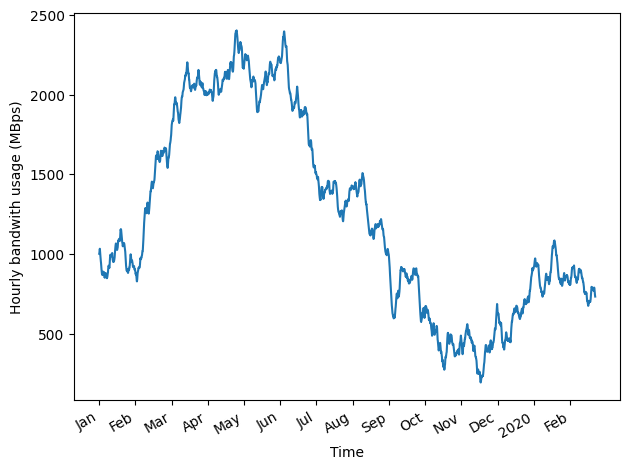

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot(df.hourly_bandwidth)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
plt.xticks(
np.arange(0, 10000, 730),
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()

Con los datos representados en la figura, puedes ver que no hay un patr√≥n peri√≥dico en los datos. Sin embargo, notar√°s la presencia de una tendencia a largo plazo, lo que significa que nuestros datos probablemente no son estacionarios. Apliquemos la prueba ADF para verificar nuestra hip√≥tesis. Nuevamente, utilizaremos la funci√≥n adfuller de statsmodels y mostraremos la estad√≠stica ADF y el valor p.

In [5]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['hourly_bandwidth'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.8714653199452735
p-value: 0.7972240255014551


Esto imprime una estad√≠stica ADF de -0.8 y un valor p de 0.80. Por lo tanto, no podemos rechazar la hip√≥tesis nula, lo que significa que nuestra serie temporal no es estacionaria. Debemos aplicar una transformaci√≥n a nuestros datos para hacerla estacionaria. Apliquemos una diferenciaci√≥n de primer orden utilizando numpy.

In [6]:
import numpy as np
bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)

Con esto hecho, podemos aplicar nuevamente la prueba ADF, esta vez sobre los datos diferenciados, para probar la estacionariedad.

In [7]:
ADF_result = adfuller(bandwidth_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -20.694853863789017
p-value: 0.0


Esto devuelve una estad√≠stica ADF de -20.69 y un valor p de 0.0. Con una estad√≠stica ADF grande y negativa y un valor p que es mucho menor que 0.05, podemos decir que nuestra serie diferenciada es estacionaria.

Ahora estamos listos para comenzar a modelar nuestro proceso estacionario utilizando un modelo ARMA(p,q). Dividiremos nuestra serie en conjuntos de entrenamiento y prueba. Aqu√≠ mantendremos los √∫ltimos 7 d√≠as de datos para el conjunto de prueba. Dado que nuestras previsiones son para las pr√≥ximas 2 horas, el conjunto de prueba contiene 84 per√≠odos de 2 horas sobre los cuales evaluar el rendimiento de nuestros modelos, ya que 7 d√≠as de datos horarios suman 168 horas.


In [8]:
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})
train = df_diff[:-168]
test = df_diff[-168:]
print(len(train))
print(len(test))

9831
168


Podemos imprimir la longitud de los conjuntos de entrenamiento y prueba como una verificaci√≥n de sensatez, y efectivamente, el conjunto de prueba tiene 168 puntos de datos, y el conjunto de entrenamiento tiene 9,831 puntos de datos.

Ahora vamos a visualizar nuestro conjunto de entrenamiento y nuestro conjunto de prueba tanto para la serie diferenciada como para la serie original. 

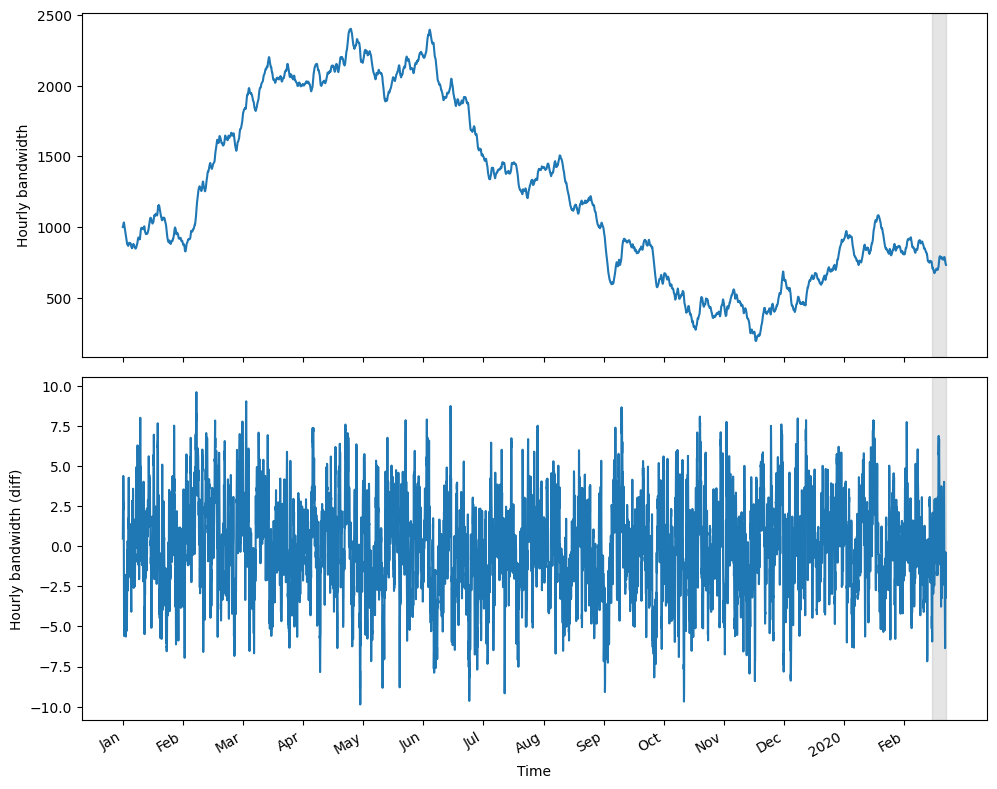

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))
ax1.plot(df.hourly_bandwidth)
ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly bandwidth')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax2.plot(df_diff.bandwidth_diff)
ax2.set_xlabel('Time')
ax2.set_ylabel('Hourly bandwidth (diff)')
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)
plt.xticks(
np.arange(0, 10000, 730),
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', '2020', 'Feb'])
fig.autofmt_xdate()
plt.tight_layout()

Con nuestro conjunto de datos listo, ahora podemos ajustar diferentes modelos ARMA(p,q) utilizando la funci√≥n optimize_ ARMA. Recuerda que la funci√≥n toma los datos y la lista de combinaciones √∫nicas de (p,q) como entrada. Dentro de la funci√≥n, inicializamos una lista vac√≠a para almacenar cada combinaci√≥n (p,q) y su correspondiente AIC.

1. La funci√≥n toma como entradas los datos de series temporales y la lista de combinaciones √∫nicas (p,q).
2. Inicializa una lista vac√≠a para almacenar el orden (p,q) y su correspondiente AIC como una tupla.
3. Iterar sobre cada combinaci√≥n √∫nica (p,q). El uso de tqdm_notebook mostrar√° una barra de progreso.
4. Ajusta un modelo ARMA(p,q) utilizando la funci√≥n SARIMAX. Especificamos `simple_differencing=False` para evitar la diferenciaci√≥n. Recuerda que la diferenciaci√≥n es el resultado de $y_t‚Äì y_{t‚Äì1}$. Tambi√©n especificamos `disp=False` para evitar imprimir mensajes de convergencia en la consola.
5. Calculate the model‚Äôs AIC.
6. Agrega la combinaci√≥n (p,q) y el AIC como una tupla a la lista de resultados.
7. Almacena la combinaci√≥n (p,q) y AIC en un DataFrame.
8. Etiquete las columnas del DataFrame.
9. Ordena el DataFrame en orden ascendente de valores AIC. Cuanto m√°s bajo sea el AIC, mejor ser√° el modelo

In [10]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame: #1
    results = [] #2
    for order in tqdm_notebook(order_list): #3
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False) #4
        except:
            continue
        aic = model.aic #5
        results.append([order, aic]) #6
    result_df = pd.DataFrame(results) #7
    result_df.columns = ['(p,q)', 'AIC'] #8
    result_df = result_df.sort_values(by='AIC',ascending=True).reset_index(drop=True) #9
    return result_df

`Aqu√≠ intentaremos valores para p y q que van de 0 a 3 inclusivamente`. Esto significa que ajustaremos 16 modelos ARMA(p,q) √∫nicos a nuestro conjunto de entrenamiento y seleccionaremos el que tenga el AIC m√°s bajo. Si√©ntete libre de cambiar el rango de valores para p y q, pero ten en cuenta que un rango m√°s amplio resultar√° en m√°s modelos ajustados y un tiempo de c√°lculo m√°s largo. Adem√°s, no necesitas preocuparte por el sobreajuste; estamos seleccionando nuestro modelo usando el AIC, lo que nos evitar√° seleccionar un modelo que sobreajuste.

In [ ]:
from itertools import product
ps = range(0, 4, 1) # El orden p puede tener los valores {0,1,2,3}.
qs = range(0, 4, 1) # El orden q puede tener los valores {0,1,2,3}.
order_list = list(product(ps, qs)) # Genera las combinaciones √∫nicas (p,q).

Con este paso completado, podemos pasar nuestro conjunto de entrenamiento y la lista de combinaciones √∫nicas (p,q) a la funci√≥n optimize_ARMA.

In [12]:
result_df = optimize_ARMA(train['bandwidth_diff'], order_list)
result_df

/tmp/ipykernel_21599/3461375138.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list): #3


  0%|          | 0/16 [00:00<?, ?it/s]

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(p,q)           AIC
0   (3, 2)  27991.063879
1   (2, 3)  27991.287509
2   (2, 2)  27991.603598
3   (3, 3)  27993.416924
4   (1, 3)  28003.349550
5   (1, 2)  28051.351401
6   (3, 1)  28071.155496
7   (3, 0)  28095.618186
8   (2, 1)  28097.250766
9   (2, 0)  28098.407664
10  (1, 1)  28172.510044
11  (1, 0)  28941.056983
12  (0, 3)  31355.802141
13  (0, 2)  33531.179284
14  (0, 1)  39402.269523
15  (0, 0)  49035.184224

`Notar√°s que los primeros tres modelos tienen todos un AIC de 27,991, con solo ligeras diferencias. Por lo tanto, argumentar√≠a que el modelo ARMA(2,2) es el modelo que se debe seleccionar`. Su valor de AIC est√° muy cerca del ARMA(3,2) y ARMA(2,3), mientras que es menos complejo, ya que tiene cuatro par√°metros a estimar en lugar de cinco. Por lo tanto, seleccionaremos el modelo ARMA(2,2) y pasaremos a los siguientes pasos, que son el an√°lisis de los residuos del modelo.

`Para realizar el an√°lisis residual, ajustaremos el modelo ARMA(2,2) a nuestro conjunto de entrenamiento. Luego utilizaremos el m√©todo plot_diagnostics para estudiar el gr√°fico Q-Q, as√≠ como los otros gr√°ficos acompa√±antes.`

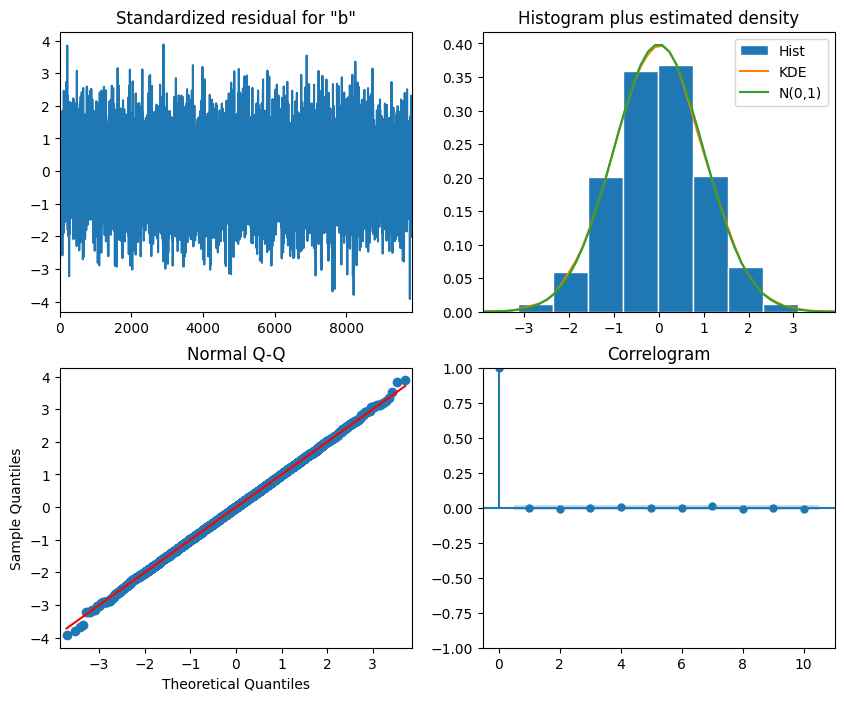

In [13]:
model = SARIMAX(train['bandwidth_diff'], order=(2,0,2),simple_differencing=False) 
# order=(p, d, q), d=0: la serie ya es estacionaria.

model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10, 8));

En la figura se puede ver que el gr√°fico en la esquina superior izquierda no muestra ninguna tendencia y la media parece constante a lo largo del tiempo, lo que significa que nuestros residuos son probablemente estacionarios. La parte superior derecha muestra un gr√°fico de densidad con una forma similar a la de una distribuci√≥n normal. El gr√°fico Q-Q en la esquina inferior izquierda muestra una l√≠nea recta gruesa que est√° muy cerca de y = x. Finalmente, el gr√°fico ACF en la esquina inferior derecha no muestra autocorrelaci√≥n despu√©s del rezago 0. Por lo tanto, la figura  indica que nuestros residuos se parecen claramente al ruido blanco, ya que est√°n distribuidos normalmente y son no correlacionados.

`Nuestro √∫ltimo paso es realizar la prueba de Ljung-Box en los residuos para los primeros 10 rezagos`. Si los valores p devueltos superan 0.05, no podemos rechazar la hip√≥tesis nula, lo que significa que nuestros residuos son no correlacionados y distribuidos independientemente, al igual que el ruido blanco.

In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = model_fit.resid

lb_test = acorr_ljungbox(residuals, lags=np.arange(1, 11))  # No importa el return_df
# Extraer solo los p-values como array
pvalue = lb_test["lb_pvalue"].values

print(pvalue)

[0.83725732 0.81124743 0.91441596 0.9315449  0.97367787 0.98101905
 0.95260714 0.91906661 0.95361504 0.96401518]


Los valores p devueltos superan todos 0.05. Por lo tanto, podemos concluir que nuestros residuos son efectivamente no correlacionados. Nuestro modelo ARMA(2,2) ha pasado todas las pruebas en el an√°lisis de residuos, y estamos listos para utilizar este modelo para predecir el uso de ancho de banda.

# Pronosticando el uso de ancho de banda

En la secci√≥n anterior, aplicamos el procedimiento general de modelado en el conjunto de datos de ancho de banda y concluimos que un modelo ARMA(2,2) era el mejor modelo para nuestros datos. Ahora utilizaremos el modelo ARMA(2,2) para predecir las pr√≥ximas 2 horas de uso de ancho de banda durante 7 d√≠as.

Reutilizaremos la funci√≥n rolling_forecast que definimos y usamos en los cap√≠tulos 4 y 5, como se muestra en el listado 6.3. Recuerda que esta funci√≥n nos permite pronosticar unos pocos pasos de tiempo a la vez, hasta que tengamos pron√≥sticos para todo el horizonte. Esta vez, por supuesto, ajustaremos un modelo ARMA(2,2) a nuestros datos diferenciados. Adem√°s, compararemos el rendimiento del modelo con dos puntos de referencia: la media y el √∫ltimo valor conocido. Esto nos permitir√° asegurarnos de que un modelo ARMA(2,2) rinde mejor que los m√©todos de pron√≥stico ingenuos.

In [21]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int,window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    
    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value
    
    elif method == 'ARMA':
        pred_ARMA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
        return pred_ARMA

Con rolling_forecast  definido, podemos usarlo para evaluar el rendimiento de los diferentes m√©todos de pron√≥stico. Primero crearemos un DataFrame para contener los valores reales del conjunto de prueba, as√≠ como las predicciones de los diferentes m√©todos. Luego especificaremos el tama√±o de los conjuntos de entrenamiento y prueba. Vamos a predecir dos pasos a la vez, porque tenemos un modelo ARMA(2,2), lo que significa que hay un componente MA(2). Sabemos por el cap√≠tulo 4 que predecir m√°s all√° de q pasos en el futuro con un modelo MA(q) simplemente devolver√° la media, por lo que las predicciones permanecer√°n planas.

`Por lo tanto, evitaremos esta situaci√≥n configurando la ventana en 2`. Luego podemos realizar pron√≥sticos en el conjunto de prueba utilizando el m√©todo de la media, el m√©todo del √∫ltimo valor conocido y el modelo ARMA(2,2), y almacenar cada pron√≥stico en su columna correspondiente en el conjunto de prueba.

In [23]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW,'last')
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_ARMA'] = pred_ARMA
test.head()

bandwidth_diff  pred_mean  pred_last_value  pred_ARMA
9831       -5.943995  -0.028214        -5.791207  -5.460661
9832       -5.865194  -0.028214        -5.791207  -4.890626
9833       -3.197066  -0.029410        -5.865194  -5.335905
9834       -1.090197  -0.029410        -5.865194  -4.751731
9835        0.665291  -0.029840        -1.090197  -0.375596

Luego podemos trazar y visualizar las previsiones para cada m√©todo.

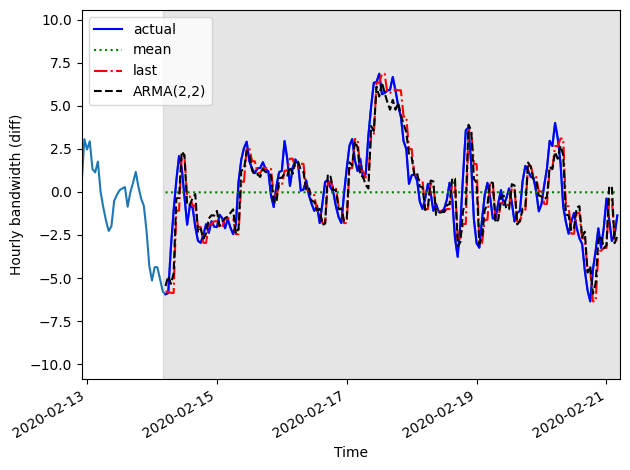

In [25]:
fig, ax = plt.subplots()
ax.plot(df_diff['bandwidth_diff'])
ax.plot(test['bandwidth_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_ARMA'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth (diff)')
ax.axvspan(9830, 9999, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)
plt.xticks(
[9802, 9850, 9898, 9946, 9994],
['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()

Figura. Pron√≥sticos del uso de ancho de banda horario diferenciado utilizando la media, el √∫ltimo valor conocido y un modelo ARMA(2,2). Se puede observar c√≥mo los pron√≥sticos de ARMA(2,2) y los pron√≥sticos del √∫ltimo valor conocido casi coinciden con los valores reales del conjunto de prueba.

Ahora mediremos el error cuadr√°tico medio (MSE) para evaluar el rendimiento de cada modelo. El modelo con el MSE m√°s bajo es el que mejor rendimiento tiene.


In [26]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['bandwidth_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['bandwidth_diff'],test['pred_last_value'])
mse_ARMA = mean_squared_error(test['bandwidth_diff'], test['pred_ARMA'])
print(mse_mean, mse_last, mse_ARMA)

6.306526957989325 2.2297582947733656 1.7690462115487038


Esto devuelve un MSE de 6.3 para el m√©todo de media, 2.2 para el m√©todo del √∫ltimo valor conocido, y 1.8 para el modelo ARMA(2,2). El modelo ARMA(2,2) supera las referencias, lo que significa que tenemos un modelo de buen rendimiento.

El paso final es invertir la transformaci√≥n de nuestra previsi√≥n para llevarla a la misma escala que nuestros datos originales. Recuerde que diferenciamos los datos originales para hacerlos estacionarios. Luego se aplic√≥ el modelo ARMA(2,2) en el conjunto de datos estacionario y produjo previsiones que est√°n diferenciadas.

Para invertir la transformaci√≥n de diferenciaci√≥n, podemos aplicar una suma acumulativa, tal como hicimos en los cap√≠tulos 4 y 5.

`df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()`
Esto est√° haciendo lo siguiente:

- Toma el valor de hourly_bandwidth en la posici√≥n 9832 como punto de partida.

- A eso le suma la suma acumulada de las predicciones ARMA (test['pred_ARMA'].cumsum()).

- As√≠, est√° reconstruyendo valores predichos acumulados a partir del √∫ltimo valor observado.

üìà Es decir: est√° simulando una serie predicha basada en valores acumulativos desde un punto inicial.

In [ ]:
df['pred_bandwidth'] = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()

/tmp/ipykernel_21599/437219497.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()
/tmp/ipykernel_21599/437219497.py:2: SettingWithCopyWarning: 
A v

Podemos entonces trazar las previsiones en la escala original de los datos.

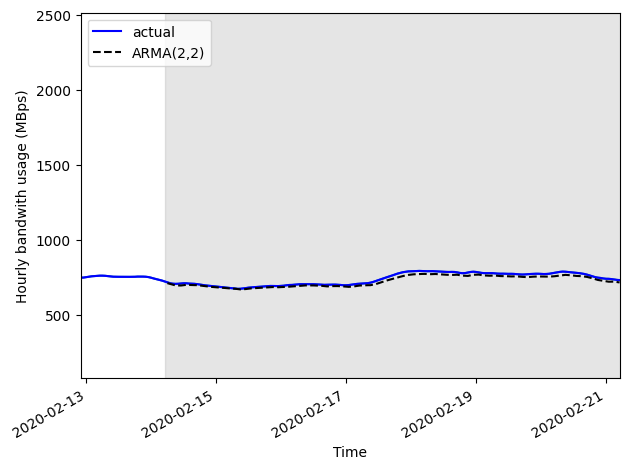

In [29]:
fig, ax = plt.subplots()
ax.plot(df['hourly_bandwidth'])
ax.plot(df['hourly_bandwidth'], 'b-', label='actual')
ax.plot(df['pred_bandwidth'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
ax.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)
plt.xticks(
[9802, 9850, 9898, 9946, 9994],
['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])
fig.autofmt_xdate()
plt.tight_layout()

Al observar los resultados en la figura, se puede ver que nuestras previsiones, representadas como una l√≠nea discontinua, siguen de cerca los valores reales del conjunto de prueba, y las dos l√≠neas casi coinciden.

Podemos medir el error absoluto medio (MAE) de las predicciones ARMA(2,2) no diferenciadas para entender qu√© tan alejadas est√°n las predicciones de los valores reales. Usaremos el MAE simplemente porque es f√°cil de interpretar.

In [30]:
from sklearn.metrics import mean_absolute_error
mae_ARMA_undiff = mean_absolute_error(df['hourly_bandwidth'][9832:],df['pred_bandwidth'][9832:])
print(mae_ARMA_undiff)

14.000362774142175


Esto da como resultado un MAE de 14, lo que significa que, en promedio, nuestras previsiones est√°n 14 Mbps por encima o por debajo del uso real del ancho de banda.

# Proximos pasos

En este cap√≠tulo, cubrimos el modelo ARMA(p,q) y c√≥mo combina eficazmente un modelo AR(p) con un modelo MA(q) para modelar y pronosticar series temporales m√°s complejas. Esto nos llev√≥ a definir un procedimiento de modelado completamente nuevo que no depende del estudio cualitativo de los gr√°ficos ACF y PACF. En su lugar, ajustamos muchos modelos ARMA(p,q) con diferentes combinaciones de (p,q) y seleccionamos el modelo con el menor AIC. Luego analizamos los residuales del modelo para asegurarnos de que sus propiedades fueran similares al ruido blanco: distribuci√≥n normal, estacionario y no correlacionado.
Este an√°lisis es tanto cualitativo, porque podemos estudiar el gr√°fico Q-Q para evaluar si los residuos est√°n distribuidos normalmente, como cuantitativo, ya que podemos aplicar la prueba de Ljung-Box para determinar si los residuos est√°n correlacionados o no. Si los residuos del modelo tienen las propiedades de una variable aleatoria, como el ruido blanco, el modelo puede ser utilizado para la predicci√≥n.

Hasta ahora hemos cubierto diferentes modelos para series temporales estacionarias: principalmente el modelo MA(q), el modelo AR(p) y el modelo ARMA(p,q). Cada modelo requiri√≥ que transform√°ramos nuestros datos para hacerlos estacionarios antes de poder realizar pron√≥sticos. Adem√°s, tuvimos que invertir la transformaci√≥n en nuestras predicciones para obtener resultados en la escala original de los datos.

`Sin embargo, hay una manera de modelar series de tiempo no estacionarias sin tener que transformarlas y revertir la transformaci√≥n en las predicciones`. Espec√≠ficamente, podemos modelar series de tiempo integradas utilizando el modelo de promedio m√≥vil integrado autorregresivo o ARIMA(p,d,q). Este ser√° el tema del siguiente cap√≠tulo.

# Resumen

- El modelo de medias m√≥viles autorregresivas, denotado como ARMA(p,q), es la combinaci√≥n del modelo autorregresivo AR(p) y el modelo de medias m√≥viles MA(q).
- Un proceso ARMA(p,q) mostrar√° un patr√≥n decreciente o un patr√≥n sinusoidal en las gr√°ficas ACF y PACF. Por lo tanto, no se pueden usar para estimar los √≥rdenes p y q.
- El procedimiento general de modelado no se basa en los gr√°ficos ACF y PACF. En su lugar, ajustamos muchos modelos ARMA(p,q) y realizamos selecci√≥n de modelos y an√°lisis de residuos.
- La selecci√≥n del modelo se realiza con el criterio de informaci√≥n de Akaike (AIC). Este cuantifica la p√©rdida de informaci√≥n de un modelo y est√° relacionado con el n√∫mero de par√°metros en un modelo y su ajuste. Cuanto menor sea el AIC, mejor ser√° el modelo.
- El AIC es una medida relativa de calidad. Devuelve el mejor modelo entre otros modelos. Para una medida absoluta de calidad, realizamos un an√°lisis de residuos.
- Los residuos de un buen modelo deben aproximarse al ruido blanco, lo que significa que deben ser no correlacionados, distribuidos normalmente e independientes.
- El gr√°fico Q-Q es una herramienta gr√°fica para comparar dos distribuciones. Lo usamos para comparar la distribuci√≥n de los residuos con respecto a una distribuci√≥n normal te√≥rica. Si el gr√°fico muestra una l√≠nea recta que se encuentra en y = x, entonces ambas distribuciones son similares. De lo contrario, significa que los residuos no est√°n distribuidos normalmente.
- La prueba de Ljung-Box nos permite determinar si los residuales est√°n correlacionados o no. La hip√≥tesis nula establece que los datos est√°n distribuidos independientemente y son no correlacionados. Si los valores p devueltos son mayores que 0.05, no podemos rechazar la hip√≥tesis nula, lo que significa que los residuales no est√°n correlacionados, al igual que el ruido blanco.